## 画像ファイルを開いて表示

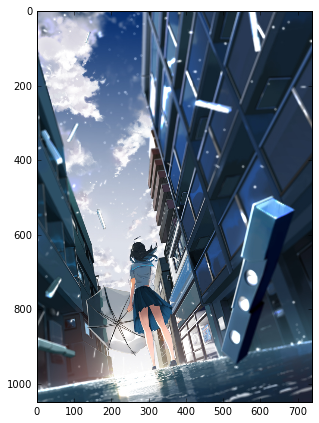

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# 画像データをロード
img = mpimg.imread('sample.jpg')

# matplotlib を使って画像を表示
fig = plt.figure(figsize=(7,7)) # 描画用の領域を用意
ax1 = fig.add_subplot(1,1,1)    # 引数はそれぞれ 縦数、横数、index 
ax1.imshow(img)


## 画像ファイルにMatrix演算を実施(低速版)

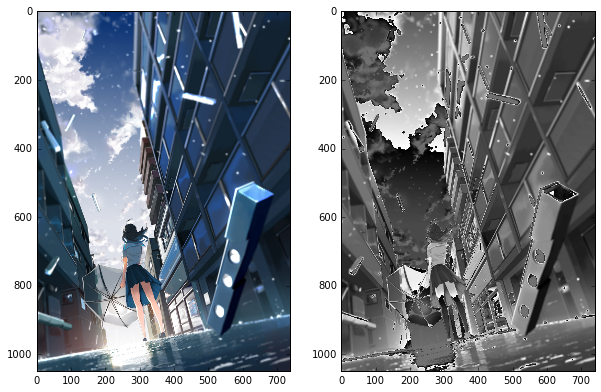

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# matrix の係数を定義
mono_conv_matrix = [[0.3, 0.65, 0.5],
                    [0.3, 0.65, 0.5],
                    [0.3, 0.65, 0.5]]

def ty_matrix(img, mat):
    # R, G, B にバラす
    r, g, b = np.dsplit(img, 3)
    
    # 行列計算
    ret_X = r * mat[0][0] + g * mat[0][1] + b * mat[0][2]
    ret_Y = r * mat[1][0] + g * mat[1][1] + b * mat[1][2]
    ret_Z = r * mat[2][0] + g * mat[2][1] + b * mat[2][2]
    
    # RGB結合
    ret_img = np.dstack( (ret_X, ret_Y, ret_Z) )

    return np.uint8(ret_img)
  
img = mpimg.imread('sample.jpg')

# matrix演算実施
out_img = ty_matrix(img, mono_conv_matrix)

# オリジナルと加工後の画像を比較表示
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1) # 引数はそれぞれ 縦数、横数、index 
ax2 = fig.add_subplot(1,2,2)
ax1.imshow(img)
ax2.imshow(out_img)

## 適当なグラフを書く

特に意味もなく $y = x^2$ を書いてみる。

== x value ==
[  0.00000000e+00   9.77517107e-04   1.95503421e-03 ...,   9.98044966e-01
   9.99022483e-01   1.00000000e+00]
== x value end == 


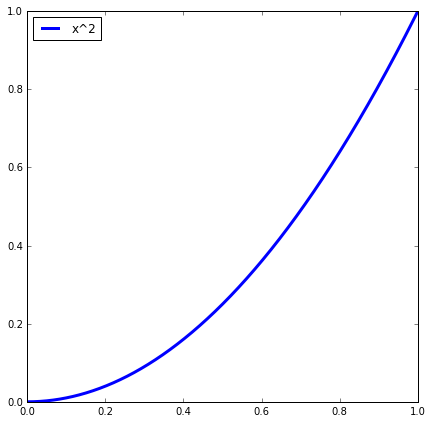

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sample_num = 1024
x = np.arange(sample_num) / (sample_num - 1) # [0:1]で正規化

# 生成した x軸を確認
print("== x value ==")
print(x)
print("== x value end == ")

y = x ** 2 

fig = plt.figure(figsize=(7,7)) # 描画用の領域を用意
ax1 = fig.add_subplot(1,1,1)    # 引数はそれぞれ 縦数、横数、index 
ax1.plot(x, y, linestyle='-', linewidth=3, label='x^2')
plt.legend(loc='upper left')   # 凡例を表示。表示位置は loc オプションで指定
plt.show()


## numpy特有の文法で値をいじる

numpy では直感的？な文法で値をいじれる。例を以下に示そう。

[ True  True  True ..., False False False]
[False False False ...,  True  True  True]


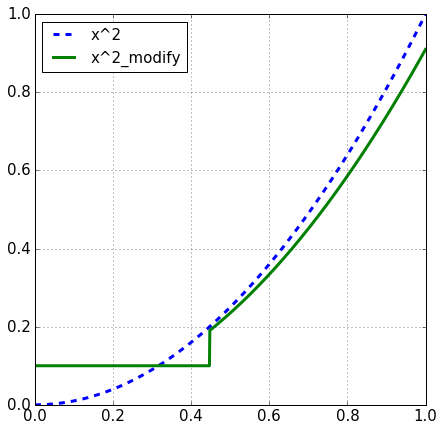

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sample_num = 1024
x = np.arange(sample_num) / (sample_num - 1) # [0:1]で正規化
y = x ** 2 
y_modify = y.copy()           # y の copy を作成。

index_set_1 = (y < 0.2)       # y が 0.1 未満となる index のリストを抽出
index_set_2 = (y >= 0.2)      # y が 0.1 以上となる index のリストを抽出
print(index_set_1)            # 結果は True, False の配列となる
print(index_set_2)
y_modify[index_set_1] = 0.1   # index_set_1 の範囲の値を総書き換え
y_modify[index_set_2] = (y_modify[index_set_2] - 0.1) * 0.9 + 0.1

fig = plt.figure(figsize=(7,7)) # 描画用の領域を用意
ax1 = fig.add_subplot(1,1,1)    # 引数はそれぞれ 縦数、横数、index 
ax1.tick_params(axis='both', which='major', labelsize=15) # 軸の設定
ax1.plot(x, y,        linestyle='--', linewidth=3, label='x^2')
ax1.plot(x, y_modify, linestyle='-',  linewidth=3, label='x^2_modify')
plt.legend(loc='upper left', fontsize=15)  # 凡例を表示。表示位置は loc オプションで指定
plt.grid()
plt.show()

## さっきの曲線をLUTとして画像に当ててみる

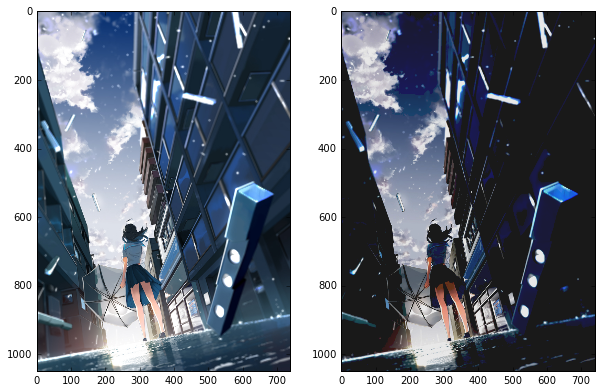

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample_num = 256
x = np.arange(sample_num) / (sample_num - 1) # [0:1]で正規化
y = x ** 2 
y_modify = y.copy()           # y の copy を作成。

index_set_1 = (y < 0.2)       # y が 0.1 未満となる index のリストを抽出
index_set_2 = (y >= 0.2)      # y が 0.1 以上となる index のリストを抽出
y_modify[index_set_1] = 0.1   # index_set_1 の範囲の値を総書き換え
y_modify[index_set_2] = (y_modify[index_set_2] - 0.1) * 0.9 + 0.1

img = mpimg.imread('sample.jpg')

picture_shape = img.shape
# LUTを当てる場合は、1次元配列にする必要があるので flatten() を適用
r, g, b = [x.flatten() for x in np.dsplit(img, 3)]

# 以下のコードでLUTが当たるんですけど、意味わかります？
r_out = y_modify[r]
g_out = y_modify[g]
b_out = y_modify[b]

# RGBの各データを再結合＆shapeを戻す
out_img = np.dstack( (r_out, g_out, b_out) ).reshape(picture_shape)

# オリジナルと加工後の画像を比較表示
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1) # 引数はそれぞれ 縦数、横数、index 
ax2 = fig.add_subplot(1,2,2)
ax1.imshow(img)
ax2.imshow(out_img)